In [1]:
%matplotlib inline
from matplotlib import style
import matplotlib.dates as mdates
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
Base = automap_base()

In [6]:
# reflect an existing database into a new model
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
inspector = inspect(engine)

In [10]:
inspector.get_table_names()

['measurement', 'station']

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
[row['name'] for row in inspect(engine).get_columns('measurement')]

['id', 'station', 'date', 'prcp', 'tobs']

In [13]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [15]:
# date_column = func.datetime(measurement.date)

# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.
engine.execute('SELECT * FROM measurement ORDER BY date DESC LIMIT 1;').fetchall()

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0)]

In [17]:
# Or I can use
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Calculate the date one year from the last date in data set.
query_date


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




datetime.date(2016, 8, 23)

In [19]:
new = session.query(measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs).filter(measurement.date >= '2016-08-23').all()


In [20]:
measurement_df = pd.DataFrame(new)
labels = measurement_df['date'].to_list()
measurement_df['date'] = measurement_df['date'].astype('datetime64[ns]')



In [21]:
measurement_df.set_index('date').sort_values('date')

,id,station,prcp,tobs
date,,,,
2016-08-23,2364,USC00519397,0.00,81.0
2016-08-23,8825,USC00517948,NaN,80.0
2016-08-23,14608,USC00519281,1.79,77.0
2016-08-23,7331,USC00514830,0.05,80.0
2016-08-23,5091,USC00513117,0.15,76.0
...,...,...,...,...
2017-08-22,12186,USC00519523,0.00,82.0
2017-08-23,7635,USC00514830,0.00,82.0
2017-08-23,2724,USC00519397,0.00,81.0


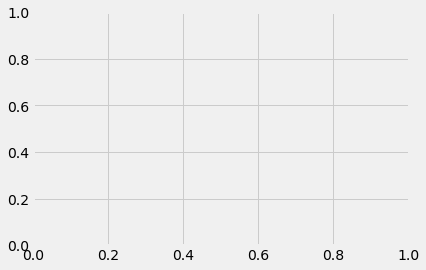

In [22]:
# The following graphs/charts wouldn't come up until I type in the following, so I set it in its own cell
fig, ax = plt.subplots()

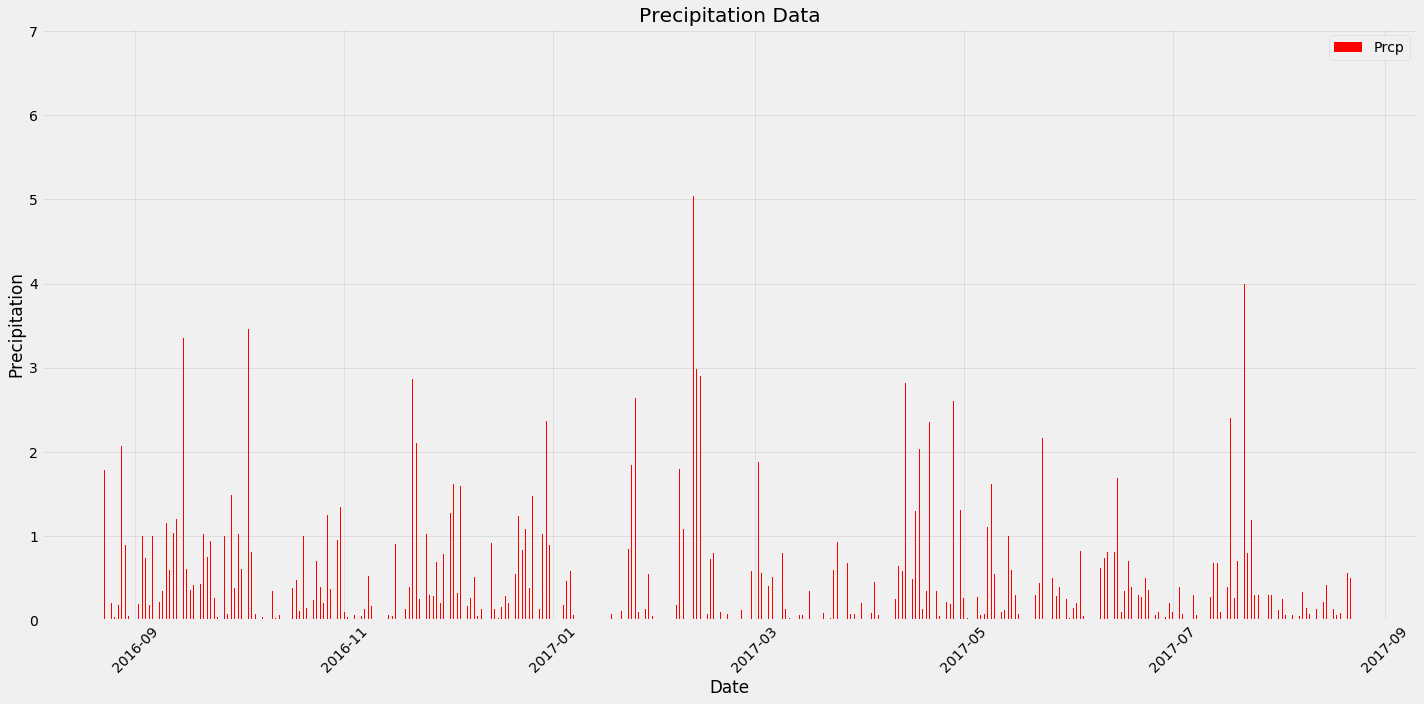

In [23]:
plt.figure(figsize=(20, 10))
plt.bar(measurement_df['date'],
measurement_df['prcp'], align='center', label="Prcp", width=.25, color='red')
plt.legend()
plt.xticks(rotation = 45)
plt.ylabel('Precipitation')
plt.xlabel('Date')
plt.title('Precipitation Data')
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.tight_layout()
plt.grid(linewidth='.5')

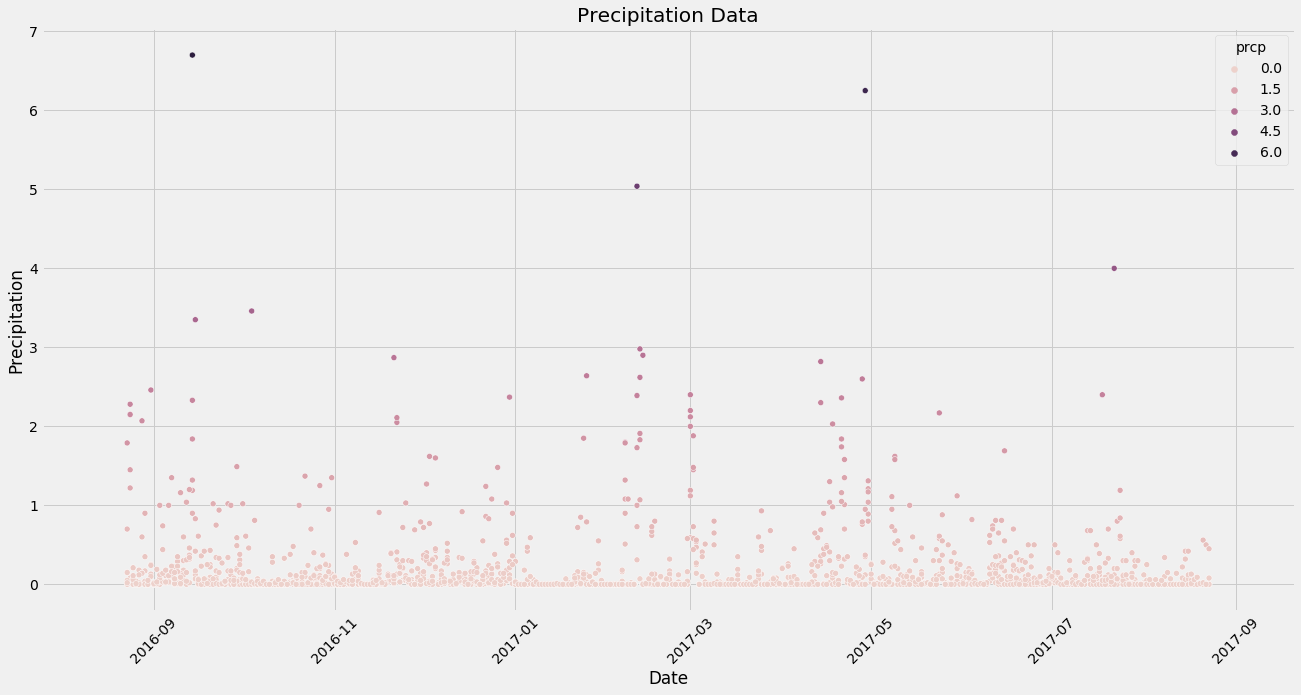

In [24]:
# Trying to get a better visual of the data, testing a few charts

plt.figure(figsize=(20,10))
sns.scatterplot(data = measurement_df['prcp'], x = measurement_df['date'], y= measurement_df['prcp'], hue=measurement_df['prcp'])
plt.xticks(rotation=45)
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.title('Precipitation Data')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.show()

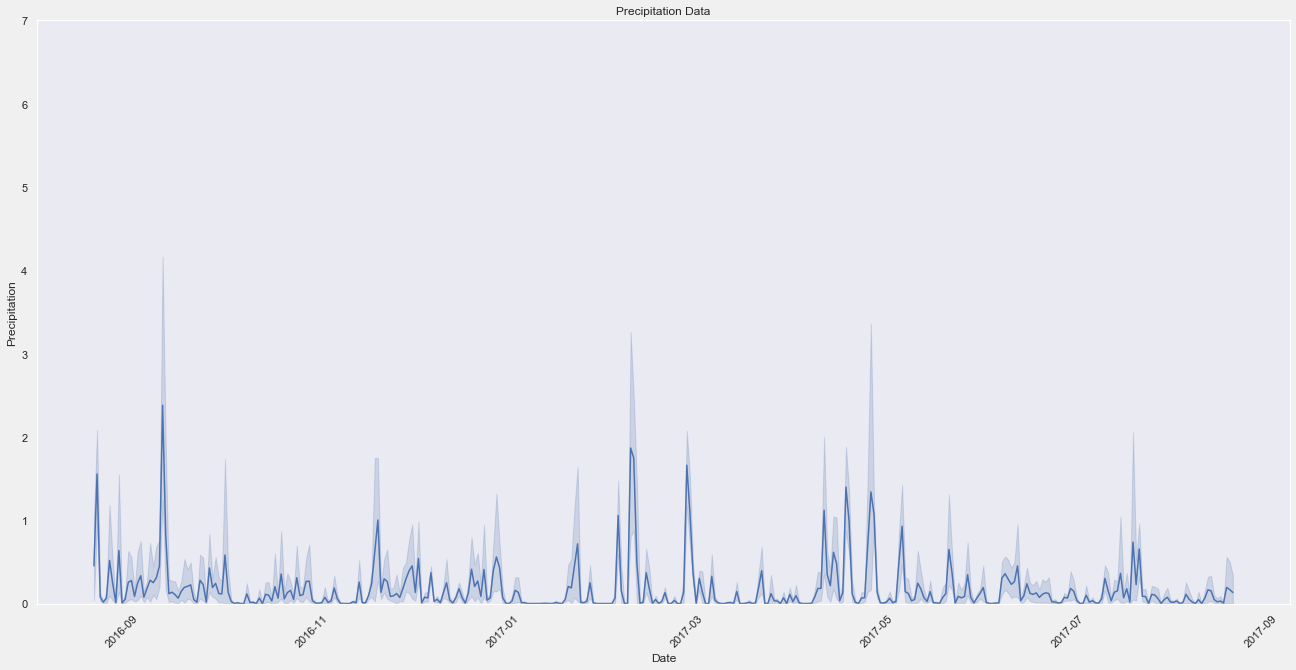

In [25]:
plt.figure(figsize=(20,10))
sns.set_theme(style="dark")
sns.lineplot(data = measurement_df['prcp'], x = measurement_df['date'], y= measurement_df['prcp'])
plt.xticks(rotation=45)
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.title('Precipitation Data')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.ylim(0,7)
plt.show()

In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data
round(measurement_df['prcp'].describe(),2)

count    2021.00
mean        0.18
std         0.46
min         0.00
25%         0.00
50%         0.02
75%         0.13
max         6.70
Name: prcp, dtype: float64

In [27]:
[row['name'] for row in inspect(engine).get_columns('station')]

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [28]:
new_2 = session.query(station.id, station.station, station.name, station.latitude, station.longitude, station.elevation)

station_df = pd.DataFrame(new_2)
station_df.head(100)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number stations in the dataset
print(f'There are {session.query(station.station).group_by(station.station).count()} stations in the station dataset')

There are 9 stations in the station dataset


In [30]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
busy_station = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
for station, count in busy_station:
    print("The station",station,"had",count, "observations.")

The station USC00519281 had 2772 observations.
The station USC00519397 had 2724 observations.
The station USC00513117 had 2709 observations.
The station USC00519523 had 2669 observations.
The station USC00516128 had 2612 observations.
The station USC00514830 had 2202 observations.
The station USC00511918 had 1979 observations.
The station USC00517948 had 1372 observations.
The station USC00518838 had 511 observations.


In [31]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').scalar()
max_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').scalar()
avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').scalar()
print(f'The lowest temp is {min_temp}, the highest is {max_temp} and the average is {round(avg_temp,2)}')

The lowest temp is 54.0, the highest is 85.0 and the average is 71.66


In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
new_2 = session.query(measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs).filter(measurement.date >= '2016-08-23').filter(measurement.station == 'USC00519281').all()
active_station = pd.DataFrame(new_2)


In [33]:
active_station

,id,station,date,prcp,tobs
0,14608,USC00519281,2016-08-23,1.79,77.0
1,14609,USC00519281,2016-08-24,2.15,77.0
2,14610,USC00519281,2016-08-25,0.06,80.0
3,14611,USC00519281,2016-08-26,0.01,80.0
4,14612,USC00519281,2016-08-27,0.12,75.0
...,...,...,...,...,...
347,14955,USC00519281,2017-08-14,0.00,77.0
348,14956,USC00519281,2017-08-15,0.32,77.0
349,14957,USC00519281,2017-08-16,0.12,76.0
350,14958,USC00519281,2017-08-17,0.01,76.0


Text(0.5, 1.0, 'Temp Histogram of Station USC00519281')

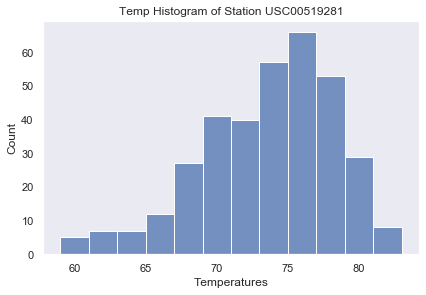

In [34]:
sns.histplot(active_station['tobs'], bins=12)
plt.xlabel('Temperatures', fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Temp Histogram of Station USC00519281', fontsize=12)


# Close session

In [35]:
# Close Session
session.close()

In [36]:
measure_df = pd.DataFrame(session.query(measurement.id, measurement.date, measurement.station, measurement.prcp, measurement.tobs))
measure_df.to_csv('hawaii_measurements.csv', index=False)
